In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler,RobustScaler,MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


## Data-Preprocessing


In [2]:
#Loading the data
try:
    df=pd.read_csv('Boston.csv')
    print('Data Loaded successfully')
    display(df.head())
except FileNotFoundError:
    print('Error! File not found')
    
#Checking for missing values
missing = df.isnull().sum()
print(f"Missing values : {missing}")

#handling them
df = df.fillna(df.mean(numeric_only=True)) #handling missing values with the mean of the column since they are numeric

#normalizing the data
scale = MaxAbsScaler() #normalizing the data to the range [-1,1]
normalized_df=scale.fit_transform(df) 
new_df = pd.DataFrame(normalized_df,columns=df.columns) #creating a new dataframe with the normalized data
display(new_df.head(10)) 

Data Loaded successfully


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Missing values : CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.000071,0.180,0.083273,0.0,0.617681,0.748861,0.652,0.337278,0.041667,0.416315,0.695455,1.000000,0.131156,0.480
1,0.000307,0.000,0.254867,0.0,0.538462,0.731321,0.789,0.409607,0.083333,0.340366,0.809091,1.000000,0.240716,0.432
2,0.000307,0.000,0.254867,0.0,0.538462,0.818337,0.611,0.409607,0.083333,0.340366,0.809091,0.989746,0.106136,0.694
3,0.000364,0.000,0.078587,0.0,0.525832,0.797039,0.458,0.499913,0.125000,0.312236,0.850000,0.994281,0.077430,0.668
4,0.000776,0.000,0.078587,0.0,0.525832,0.814009,0.542,0.499913,0.125000,0.312236,0.850000,1.000000,0.140374,0.724
5,0.000335,0.000,0.078587,0.0,0.525832,0.732346,0.587,0.499913,0.125000,0.312236,0.850000,0.992996,0.137214,0.574
6,0.000992,0.125,0.283706,0.0,0.601607,0.684738,0.666,0.458541,0.208333,0.437412,0.690909,0.996725,0.327364,0.458
7,0.001625,0.125,0.283706,0.0,0.601607,0.702961,0.961,0.490702,0.208333,0.437412,0.690909,1.000000,0.504346,0.542
8,0.002374,0.125,0.283706,0.0,0.601607,0.641344,1.000,0.501554,0.208333,0.437412,0.690909,0.974124,0.788254,0.330
9,0.001911,0.125,0.283706,0.0,0.601607,0.683827,0.859,0.543611,0.208333,0.437412,0.690909,0.974326,0.450356,0.378


## Feature Target split and model training


In [3]:
X = new_df.drop('PRICE',axis=1) #seperate price for predicting, every thing else will be considered as features
y=new_df['PRICE']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=30)#test train spliting data into 80/20

#function for the multi layer perceptron
def buildMLP(hidden_layers,input_shape):
    model = Sequential() # creating a swquential model
    model.add(Dense(units = hidden_layers[0], activation = 'relu', input_shape = input_shape)) #adding the first layer with the input shape and the number of units 
    
    for units in hidden_layers[1:]: #adding the rest of the layers
        model.add(Dense(units, activation = 'relu')) #adding the hidden layers with relu activation function
        
    model.add(Dense(1)) #adding the output layer with 1 unit since we are predicting a single value 
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae']) #compiling the model with adam optimizer and mse loss function
    
    return model 

input_shape = (X_train.shape[1],) #input shape is the number of features in the training data
model = buildMLP(hidden_layers = [64,32], input_shape = input_shape) #creating the model with  hidden layers of 64 and 32 units

model.summary() #displaying the model summary

#we will be checking the performance of the model with different architectures such as 1-layer 2layer 3-layer and 4-layer
architectures = {
    "1-layer (16 units)": [16],
    "2-layer (32, 16)": [32, 16],
    "3-layer (64, 32, 16)": [64, 32, 16],
    "4-layer (128, 64, 32, 16)": [128, 64, 32, 16]
}

results = {} #a finction to store the results of the models

for name, layers in architectures.items(): 
    print(f"\nTraining {name} architecture...") 
    
    # Building rthe model
    model = buildMLP(
        hidden_layers=layers, input_shape=(X_train.shape[1],)) #creating the model with the given architecture
    
    # training the model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,  #using 80/20 split
        epochs=100, #epochs to train the model(epoch is the number of times the model will see the data,in our case the model will see the data 100 times)
        batch_size=28, #batch size is the number of samples that will be used in each iteration
        verbose=0  # verbose=0 means no output will be displayed during training if we set it to 1 we will see the output of the training process
    )
    
    #predicing the data and calculating mse
    y_pred = model.predict(X_test) 
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse #storing the mse in results dictionary that we made above
    print(f"{name} - Test MSE: {mse:.4f}")
    

c:\Users\This PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)


Training 1-layer (16 units) architecture...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1-layer (16 units) - Test MSE: 0.0080

Training 2-layer (32, 16) architecture...


c:\Users\This PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2-layer (32, 16) - Test MSE: 0.0053

Training 3-layer (64, 32, 16) architecture...


c:\Users\This PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002C5070B91B0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3-layer (64, 32, 16) - Test MSE: 0.0047

Training 4-layer (128, 64, 32, 16) architecture...


c:\Users\This PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4-layer (128, 64, 32, 16) - Test MSE: 0.0043


## Accuracy Calculations


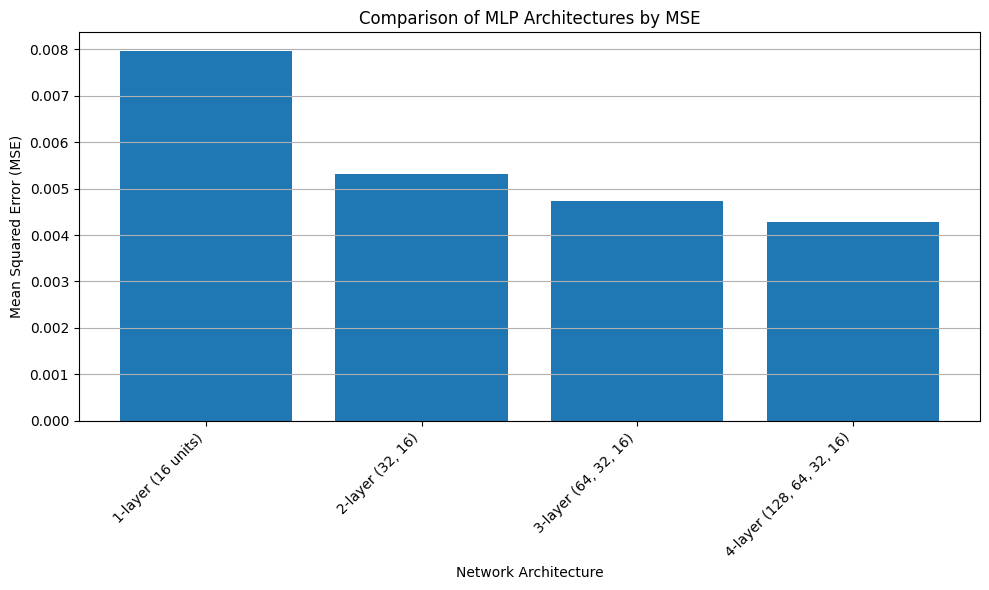

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title("Comparison of MLP Architectures by MSE")
plt.xlabel("Network Architecture")
plt.ylabel("Mean Squared Error (MSE)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()